In [1]:
%config Completer.use_jedi = False
import warnings
warnings.filterwarnings(action='ignore')

비음수 행렬 분해(NMF, Non-negative Matrix Factorization)  
비음수 행렬 분해는 데이터 행렬 내 모든 원소값이 0보다 큰 경우에 사용할 수 있는 행렬 분해 방법이다.  

비음수 행렬 분해 알고리즘을 이용해 사람 얼굴의 특징 요소를 추출하는 모형을 생성해본다.

In [2]:
# 비음수 행렬 분해에는 얼굴 데이터를 이용한다.
# 비음수 행렬 분해에서 쓰이는 데이터는 성분이 모두 음수가 아닌 성분이어야 하므로, 주로 얼굴 데이터 혹은 음성 데이터와
# 같이 음수값이 없는 데이터가 많이 사용된다.
from sklearn import datasets # 얼굴 데이터를 사용하기 위해 import 한다.
# fetch_lfw_people 데이터셋에서 min_faces_per_person 옵션으로 최소 얼굴 개수, resize 옵션으로 사이즈 조정 정도, 
# color 옵션으로 컬러 표시 여부를 설정해서 얼굴 데이터를 불러온다.
raw_face = datasets.fetch_lfw_people(min_faces_per_person=20, resize=0.5, color=False)

In [3]:
# 데이터 살펴보기
# raw_face.images: 얼굴 데이터를 사각형 행렬로 나타낸 데이터
n_samples, h, w = raw_face.images.shape
print('n_samples: {}, h: {}, w: {}'.format(n_samples, h, w)) # 총 얼굴 개수, 세로 길이, 가로 길이

# raw_face.data: 얼굴 데이터 행렬을 일렬로 늘어뜨려 하나의 행으로 표현한 데이터
X = raw_face.data # 얼굴 피쳐 데이터를 저장한다.
n, p = X.shape
# n이 1721인 이유는 모든 얼굴 데이터 개수가 1721개이기 때문이고 p가 2914인 이유는 기존 64 * 47 행렬을 일려로
# 늘어뜨리면 2914이므로 전체 행렬의 차원은 1721 * 2914라는 것을 알 수 있다.
print('n: {}, p: {}'.format(n, p))

y = raw_face.target # 얼굴 타겟 데이터를 저장한다.
target_names = raw_face.target_names # 얼굴 데이터 이름
k = target_names.shape[0] # 타겟 데이터의 클래스 개수 즉, 얼굴 종류는 총 21개이다.
print('k: {}'.format(k))

n_samples: 3023, h: 62, w: 47
n: 3023, p: 2914
k: 62


In [4]:
# 트레이닝/테스트 데이터 분할
from sklearn.model_selection import train_test_split # 트레이닝/테스트 데이터 분할을 위해 import 한다.
X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state=1) # 트레이닝 데이터와 테스트 데이터로 분할한다.
print(X_tn.shape, X_te.shape)

(2267, 2914) (756, 2914)


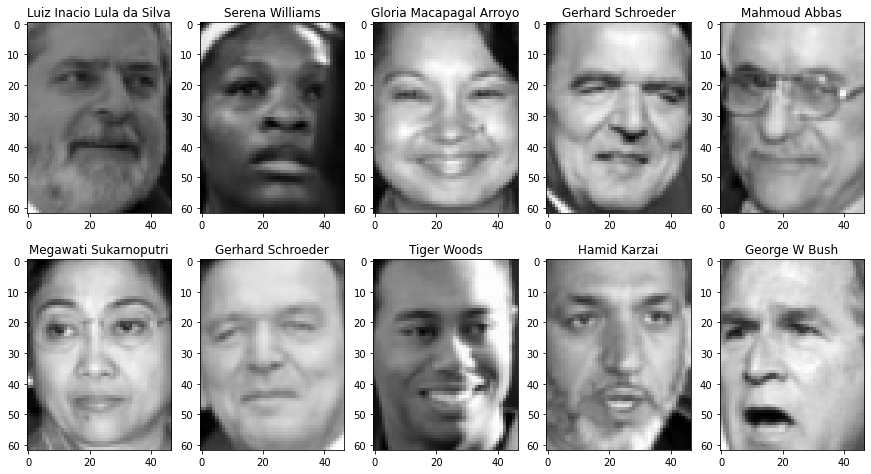

In [5]:
# 오리지널 데이터 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=[15, 8])
plt.gray() # 흑백으로 출력하도록 설정한다.
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_tn[i].reshape((h, w))) # 얼굴 데이터를 그린다.
    plt.title(target_names[y_tn[i]]) # 각 얼굴 데이터의 제목을 붙인다.
plt.show()

In [6]:
# 비음수 행렬 분해를 통한 데이터 차원 축소
from sklearn.decomposition import NMF # 비음수 행렬 분해 알고리즘을 사용하기 위해 import 한다.
# 2914 차원의 데이터를 10 차원으로 줄인다.
nmf = NMF(n_components=10, random_state=0) # 비음수 행렬 분해 객체를 만든다.
nmf.fit(X_tn) # 피쳐 데이터 X_tn을 비음수 행렬 분해 객체에 적합시킨다.
X_tn_nmf = nmf.transform(X_tn) # 적합된 비음수 행렬 분해 모형을 바탕으로 트레이닝 데이터의 차원을 축소한다.
X_te_nmf = nmf.transform(X_te) # 적합된 비음수 행렬 분해 모형을 바탕으로 테스트 데이터의 차원을 축소한다.

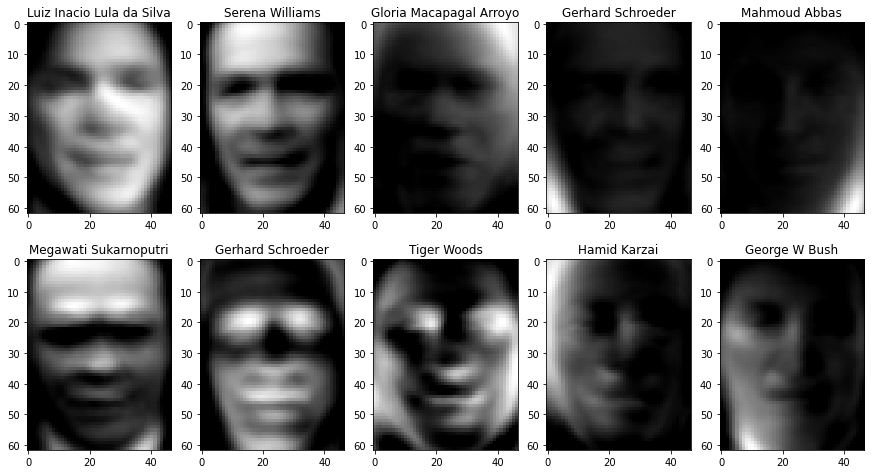

In [7]:
# 비음수 행렬 분해한 데이터 시각화
plt.figure(figsize=[15, 8])
plt.gray()
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(nmf.components_[i].reshape((h, w)))
    plt.title(target_names[y_tn[i]])
plt.show()